<a href="https://colab.research.google.com/github/RCNXV/Project-Machine-Learning-with-Python-Simple-Recommender-System/blob/main/Simple_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction


Simple Recommender Engine offers recommendations that are common to all users based on the popularity of the movie and sometimes the genre. The initial idea behind this recommendation system is as follows:

1. The more popular movies will have a greater likelihood of being liked also by the average audience
2. This model does not provide personalized recommendations for each type of user
3. The implementation of this model is also quite easy, all we need to do is sort the films by rating and popularity and show the top films from the list of films
4. In addition, we can add genres to get the top movies for those specific genres

# Import Library and File Unloading

In [30]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
pd.set_option('display.max_columns', None)

movie_df = pd.read_csv('/content/drive/MyDrive/Kerja/DA/Portofolio/Simple Recommender System/Dataset/title.basics.tsv', sep='\t')
rating_df = pd.read_csv('/content/drive/MyDrive/Kerja/DA/Portofolio/Simple Recommender System/Dataset/title.ratings.tsv', sep='\t')

Mounted at /content/drive


# Cleaning Table

The first thing to do is to look at the movie_df by looking at the top 5 data and data type information as an overview of the table.

In [31]:
movie_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0221078,short,"Circle Dance, Ute Indians","Circle Dance, Ute Indians",0,1898,\N,\N,"Documentary,Short"
1,tt8862466,tvEpisode,"¡El #TeamOsos va con todo al ""Reality del amor""!","¡El #TeamOsos va con todo al ""Reality del amor""!",0,2018,\N,\N,"Comedy,Drama"
2,tt7157720,tvEpisode,Episode #3.41,Episode #3.41,0,2016,\N,29,"Comedy,Game-Show"
3,tt2974998,tvEpisode,Episode dated 16 May 1987,Episode dated 16 May 1987,0,1987,\N,\N,News
4,tt2903620,tvEpisode,Frances Bavier: Aunt Bee Retires,Frances Bavier: Aunt Bee Retires,0,1973,\N,\N,Documentary


In [32]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9025 entries, 0 to 9024
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tconst          9025 non-null   object
 1   titleType       9025 non-null   object
 2   primaryTitle    9011 non-null   object
 3   originalTitle   9011 non-null   object
 4   isAdult         9025 non-null   int64 
 5   startYear       9025 non-null   object
 6   endYear         9025 non-null   object
 7   runtimeMinutes  9025 non-null   object
 8   genres          9014 non-null   object
dtypes: int64(1), object(8)
memory usage: 634.7+ KB


It can be seen that there is still a missing value, so it is necessary to do treatment


In [33]:
movie_df.isnull().sum()

tconst             0
titleType          0
primaryTitle      14
originalTitle     14
isAdult            0
startYear          0
endYear            0
runtimeMinutes     0
genres            11
dtype: int64

It can be seen that the missing value is in the 'primaryTitle', 'originalTitle', and 'genres' columns.
Look at the rows that have missing values in the 'primaryTitle' and 'originalTitle' columns

In [34]:
movie_df.loc[(movie_df['primaryTitle'].isnull()) | (movie_df['originalTitle'].isnull())]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
9000,tt10790040,tvEpisode,NaN,NaN,0,2019,\N,\N,\N
9001,tt10891902,tvEpisode,NaN,NaN,0,2020,\N,\N,Crime
9002,tt11737860,tvEpisode,NaN,NaN,0,2020,\N,\N,"Comedy,Drama,Romance"
9003,tt11737862,tvEpisode,NaN,NaN,0,2020,\N,\N,"Comedy,Drama,Romance"
9004,tt11737866,tvEpisode,NaN,NaN,0,2020,\N,\N,"Comedy,Drama,Romance"
9005,tt11737872,tvEpisode,NaN,NaN,0,2020,\N,\N,\N
9006,tt11737874,tvEpisode,NaN,NaN,0,2020,\N,\N,"Comedy,Drama,Romance"
9007,tt1971246,tvEpisode,NaN,NaN,0,2011,\N,\N,Biography
9008,tt2067043,tvEpisode,NaN,NaN,0,1965,\N,\N,Music
9009,tt4404732,tvEpisode,NaN,NaN,0,2015,\N,\N,Comedy


Delete all the rows that have missing value in the 'primaryTitle' and 'originalTitle' columns

In [35]:
movie_df = movie_df.loc[(movie_df['primaryTitle'].notnull()) & (movie_df['originalTitle'].notnull())]
len(movie_df)

9011

After analyzing the missing value in the “primaryTitle” and “originalTitle” columns, the rows that have the missing value are removed so that the number of rows becomes 9011
Then, look at data that have missing value in the 'genres' columns.

In [36]:
movie_df.loc[movie_df['genres'].isnull()]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
9014,tt10233364,tvEpisode,Rolling in the Deep Dish\tRolling in the Deep ...,0,2019,\N,\N,Reality-TV,NaN
9015,tt10925142,tvEpisode,The IMDb Show on Location: Star Wars Galaxy's ...,0,2019,\N,\N,Talk-Show,NaN
9016,tt10970874,tvEpisode,Die Bauhaus-Stadt Tel Aviv - Vorbild für die M...,0,2019,\N,\N,\N,NaN
9017,tt11670006,tvEpisode,...ein angenehmer Unbequemer...\t...ein angene...,0,1981,\N,\N,Documentary,NaN
9018,tt11868642,tvEpisode,GGN Heavyweight Championship Lungs With Mike T...,0,2020,\N,\N,Talk-Show,NaN
9019,tt2347742,tvEpisode,No sufras por la alergia esta primavera\tNo su...,0,2004,\N,\N,\N,NaN
9020,tt3984412,tvEpisode,"I'm Not Going to Come Last, I'm Just Going to ...",0,2014,\N,\N,Reality-TV,NaN
9021,tt8740950,tvEpisode,Weight Loss Resolution Restart - Ins & Outs of...,0,2015,\N,\N,Reality-TV,NaN
9022,tt9822816,tvEpisode,Zwischen Vertuschung und Aufklärung - Missbrau...,0,2019,\N,\N,\N,NaN
9023,tt9900062,tvEpisode,The Direction of Yuu's Love: Hings Aren't Goin...,0,1994,\N,\N,"Animation,Comedy,Drama",NaN


In [37]:
movie_df = movie_df.loc[movie_df['genres'].notnull()]
len(movie_df)

9000

The genres column also has a missing value, so after analysis, the row that has the missing value needs to be discarded. So that movie_df table has 9000 rows.
For data valued at '\\N' which means the null value on the “startYear”, “endYear”, and “runtimeMinutes” columns is changed to np.nan and to float64.

In [67]:
#change the value of '\\N' on startYear to np.nan and cast the column to float64
movie_df['startYear'] = movie_df['startYear']. replace('\\N',np.nan). astype('float64')
print(movie_df['startYear'].unique()[:5])

#change the value of '\\N' on endYear to np.nan and cast the column to float64
movie_df.loc[:,('endYear')] = movie_df['endYear'].replace('\\N',np.nan). astype('float64')
print(movie_df['endYear'].unique()[:5])

#change the value of '\\N' on runtimeMinutes to np.nan and cast the column to float64
movie_df.loc[:,('runtimeMinutes')] = movie_df['runtimeMinutes'].replace('\\N', np.nan). astype('float64')
print(movie_df['runtimeMinutes'].unique()[:5])

[1898. 2018. 2016. 1987. 1973.]
[  nan 2005. 1955. 2006. 1999.]
[nan 29.  7. 23. 85.]


Change the data type in the 'genre' column to a list, because there are several types of genres in certain films



In [39]:
def transform_to_list(x):
    if ',' in x: 
    #change to list if there is data in the genre column
        return x.split(',')
    else: 
    #If there is no data, change it to an empty list
        return []

movie_df.loc[:,('genres')] = movie_df['genres'].apply(lambda x: transform_to_list(x))

Now we move to the second dataset, that is rating_df.
There are 3 columns, namely 'tconst', 'averageRating', and 'numVotes'

In [40]:
rating_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1608
1,tt0000002,6.0,197
2,tt0000003,6.5,1285
3,tt0000004,6.1,121
4,tt0000005,6.1,2050


In [41]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030009 entries, 0 to 1030008
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1030009 non-null  object 
 1   averageRating  1030009 non-null  float64
 2   numVotes       1030009 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ MB


There is no missing value in this dataset, so we can use it already.
Merge the two tables, it can be seen that there is the same column, namely the tconst column, so that it is combined with the inner join method

In [42]:
movie_rating_df = pd.merge(movie_df, rating_df, on='tconst', how='inner')

movie_rating_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0043745,short,Lion Down,Lion Down,0,1951.0,NaN,7.0,"[Animation, Comedy, Family]",7.1,459
1,tt0167491,video,Wicked Covergirls,Wicked Covergirls,1,1998.0,NaN,85.0,[],5.7,7
2,tt6574096,tvEpisode,Shadow Play - Part 2,Shadow Play - Part 2,0,2017.0,NaN,22.0,"[Adventure, Animation, Comedy]",8.5,240
3,tt6941700,tvEpisode,RuPaul Roast,RuPaul Roast,0,2017.0,NaN,NaN,[],8.0,11
4,tt7305674,video,UCLA Track & Field Promo,UCLA Track & Field Promo,0,2017.0,NaN,NaN,"[Short, Sport]",9.7,7


In [43]:
movie_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1376 entries, 0 to 1375
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          1376 non-null   object 
 1   titleType       1376 non-null   object 
 2   primaryTitle    1376 non-null   object 
 3   originalTitle   1376 non-null   object 
 4   isAdult         1376 non-null   int64  
 5   startYear       1376 non-null   float64
 6   endYear         26 non-null     float64
 7   runtimeMinutes  1004 non-null   float64
 8   genres          1376 non-null   object 
 9   averageRating   1376 non-null   float64
 10  numVotes        1376 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 129.0+ KB


Delete movies that have missing value in 'startYear' and 'runtimeMinutes' columns. 

In [44]:
movie_rating_df = movie_rating_df.dropna(subset=['startYear','runtimeMinutes'])
movie_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004 entries, 0 to 1374
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          1004 non-null   object 
 1   titleType       1004 non-null   object 
 2   primaryTitle    1004 non-null   object 
 3   originalTitle   1004 non-null   object 
 4   isAdult         1004 non-null   int64  
 5   startYear       1004 non-null   float64
 6   endYear         17 non-null     float64
 7   runtimeMinutes  1004 non-null   float64
 8   genres          1004 non-null   object 
 9   averageRating   1004 non-null   float64
 10  numVotes        1004 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 94.1+ KB


The dataset is ready to use.

#Building Simple Recommender System

This Recommender System is using IMDB weighted Rating Formula.
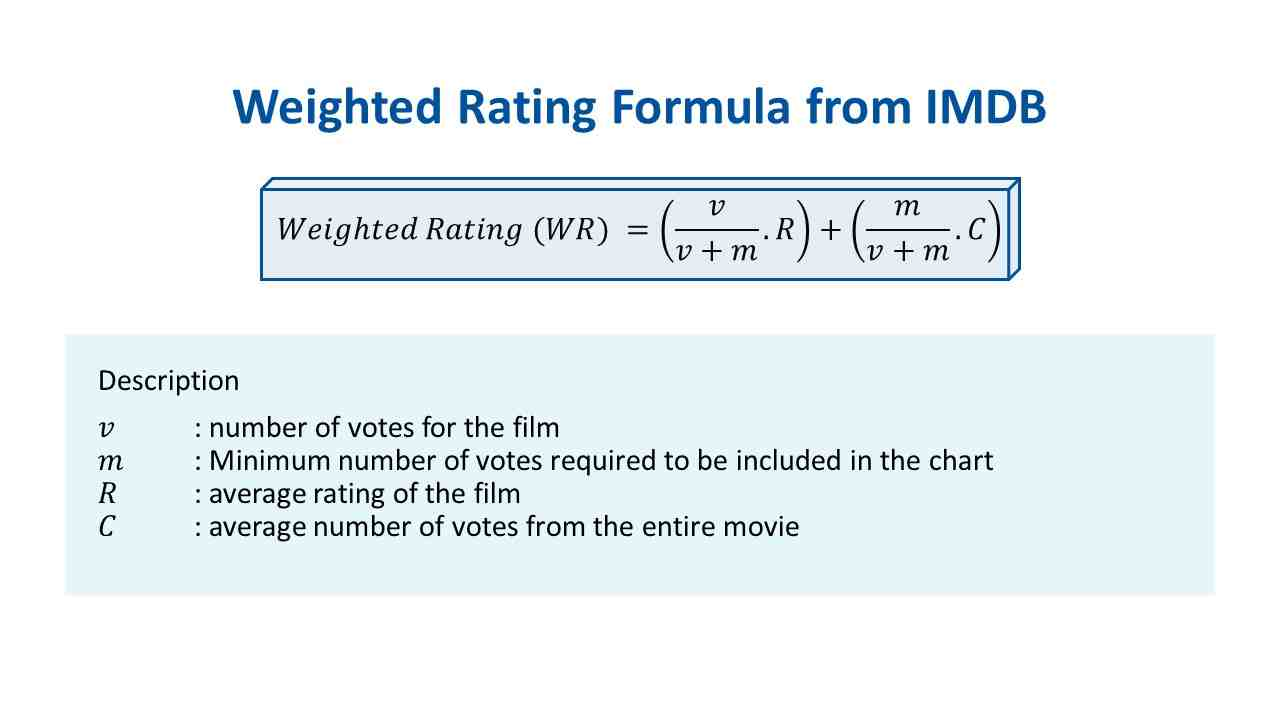


First, find the value of C and m.

In [45]:
#C value
C = movie_rating_df['averageRating'].mean()
print('C =', C)

#m value
m = movie_rating_df['numVotes'].quantile(0.8)
print('m =', m)

C = 6.829581673306773
m = 229.0


Defines a function to calculate the score of each movie (WR Formula)

In [46]:
#IMDB Weighted Rating Formula
def imdb_weighted_rating(df, var=0.8):
    v = df['numVotes']
    R = df['averageRating']
    C = df['averageRating'].mean()
    m = df['numVotes'].quantile(var)
    df.loc[:,('score')] = ((v / (v + m)) * (R)) + ((m / (v + m)) * C)
    return df['score']
    
imdb_weighted_rating(movie_rating_df)

movie_rating_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score
0,tt0043745,short,Lion Down,Lion Down,0,1951.0,NaN,7.0,"[Animation, Comedy, Family]",7.1,459,7.009992
1,tt0167491,video,Wicked Covergirls,Wicked Covergirls,1,1998.0,NaN,85.0,[],5.7,7,6.796077
2,tt6574096,tvEpisode,Shadow Play - Part 2,Shadow Play - Part 2,0,2017.0,NaN,22.0,"[Adventure, Animation, Comedy]",8.5,240,7.684380
5,tt2262289,movie,The Pin,The Pin,0,2013.0,NaN,85.0,[],7.7,27,6.921384
6,tt0874027,tvEpisode,Episode #32.9,Episode #32.9,0,2006.0,NaN,29.0,"[Comedy, Game-Show, News]",8.0,8,6.869089


Creating simple recommender system using WR formula. This recommendation system sorts the score values and displays some of the top data as desired

In [47]:
#Simple Recommender System
def simple_recommender(df, top=100):
    df = df.loc[df['numVotes'] >= m]
    df = df.sort_values(by='score', ascending=False)
    
    df = df[:top]
    return df
      
simple_recommender(movie_rating_df, top=25)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score
68,tt4110822,tvEpisode,S.O.S. Part 2,S.O.S. Part 2,0,2015.0,NaN,43.0,"[Action, Adventure, Drama]",9.4,3820,9.254624
236,tt2200252,video,Attack of the Clones Review,Attack of the Clones Review,0,2010.0,NaN,86.0,[],9.3,1411,8.955045
1181,tt7697962,tvEpisode,Chapter Seventeen: The Missionaries,Chapter Seventeen: The Missionaries,0,2019.0,NaN,54.0,"[Drama, Fantasy, Horror]",9.2,1536,8.892450
326,tt7124590,tvEpisode,Chapter Thirty-Four: Judgment Night,Chapter Thirty-Four: Judgment Night,0,2018.0,NaN,42.0,"[Crime, Drama, Mystery]",9.1,1859,8.850993
1045,tt0533506,tvEpisode,The Prom,The Prom,0,1999.0,NaN,60.0,"[Action, Drama, Fantasy]",8.9,2740,8.740308
71,tt8399426,tvEpisode,Savages,Savages,0,2018.0,NaN,58.0,"[Drama, Fantasy, Romance]",9.0,1428,8.700045
1234,tt2843830,tvEpisode,VIII.,VIII.,0,2014.0,NaN,57.0,"[Adventure, Drama]",8.9,1753,8.660784
1087,tt4295140,tvSeries,Chef's Table,Chef's Table,0,2015.0,NaN,50.0,[],8.6,12056,8.566998
1054,tt2503932,tvEpisode,Trial and Error,Trial and Error,0,2013.0,NaN,43.0,"[Drama, Fantasy, Horror]",8.6,2495,8.451165
448,tt0337566,video,AC/DC: Live at Donington,AC/DC: Live at Donington,0,1992.0,NaN,120.0,"[Documentary, Music]",8.5,1343,8.256663


We can add user preferences to the recommender system. By adding other filters, a system can be created that utilizes columns in tables such as isAdult, startYear, genres

In [66]:
#Simple Recommender System with User Preferences
df = movie_rating_df.copy()

def user_prefer_recommender(df, ask_adult, ask_start_year, ask_genre, top=100):
    #ask_adult = yes/no
    if ask_adult.lower() == 'yes':
        df=df.loc[df['isAdult'] == 1]
    elif ask_adult.lower() == 'no':
        df=df.loc[df['isAdult'] == 0]

    #ask_start_year = numeric
    df = df.loc[df['startYear'] >= int(ask_start_year)]

    #ask_genre = 'all' or else
    if ask_genre.lower() == 'all':
        df = df
    else:
        def filter_genre(x):
            if ask_genre.lower() in str(x).lower():
                return True
            else:
                return False
        df = df.loc[df['genres'].apply(lambda x: filter_genre(x))]

    df = df.loc[df['numVotes'] == m]
    df = df.sort_values(by='score', ascending=False)
    
    df = df[:top]
    return df

#Example
user_prefer_recommender(df, ask_adult = 'no', ask_start_year = 1987.0, ask_genre = 'Comedy')

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score
1282,tt0095194,movie,Galactic Gigolo,Galactic Gigolo,0,1987.0,NaN,80.0,"[Comedy, Sci-Fi]",3.4,229,5.114791
